<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span><ul class="toc-item"><li><span><a href="#Lets-get-all-the-motor-and-counter-mnemonics" data-toc-modified-id="Lets-get-all-the-motor-and-counter-mnemonics-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Lets get all the motor and counter mnemonics</a></span><ul class="toc-item"><li><span><a href="#So-I-need-to-grab-82-lines" data-toc-modified-id="So-I-need-to-grab-82-lines-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>So I need to grab 82 lines</a></span></li></ul></li></ul></li><li><span><a href="#Lets-test-out-the-return-of-the-plot-points" data-toc-modified-id="Lets-test-out-the-return-of-the-plot-points-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Lets test out the return of the plot points</a></span><ul class="toc-item"><li><span><a href="#Here-is-an-example-of-what-happens-when-control-is-not-available-and-some-extra-stuff" data-toc-modified-id="Here-is-an-example-of-what-happens-when-control-is-not-available-and-some-extra-stuff-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Here is an example of what happens when control is not available and some extra stuff</a></span></li></ul></li></ul></div>

# Imports

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output
from fnmatch import filter

import pandas as pd
import imp, time, os, re

import bServer_funcs; imp.reload(bServer_funcs)
from bServer_funcs import *

import watcher_funcs; imp.reload(watcher_funcs)
from watcher_funcs import get_from_pdi, get_from_pdi2

In [2]:
pdi_file = os.path.join("P:\\bl2-1\\Dunn", 'checkout_checkout_191105_scan351_0010.raw.pdi')

t0 = time.time()
for i in range(1000):
    Counters1, Motors1 = get_from_pdi(pdi_file)
    
print((time.time() - t0)/1000)

t0 = time.time()
for i in range(1000):
    Counters2, Motors2 = get_from_pdi2(pdi_file)
    
print((time.time() - t0)/1000)

0.0008888223171234131
0.0008178362846374511


In [58]:
paths, filetypes = ["Z:\\", "P:\\bl2-1\\Dunn"], ['raw', 'pdi']

before = dict( [filetype, dict([(f, None) for f in filter(os.listdir (path), f'*{filetype}')])] for (path, filetype) in zip(paths, filetypes) )

In [35]:
after = dict ( [filetype, dict ([(f, None) for f in filter(os.listdir (path), f'*{filetype}')])]
                          for (path, filetype) in zip(paths, filetypes) )

In [62]:

added = [f for f in after[filetype] if not f in before[filetype]]

In [61]:
filetype = filetypes[0]
after = dict ( [filetype, dict ([(f, None) for f in filter(os.listdir (path), f'*{filetype}')])]
                          for (path, filetype) in zip(paths, filetypes) )
print(len(before[filetype]), len(after[filetype]))

5700 5711


In [6]:
import watcher; imp.reload(watcher)
from watcher import Watcher
from multiprocessing import Queue
#queue = Queue()

watchP = Watcher(watchPaths = ["Z:\\", "P:\\bl2-1\\Dunn"],
                 filetypes = ['raw', 'pdi'],
                 pollingPeriod=0.01,
                 verbose=True
                )#queue=queue)
watchP.run()

pdi - Added: ['P:\\bl2-1\\Dunn\\checkout_checkout_191112_scan9_0000.raw.pdi']
raw - Added: ['Z:\\checkout_checkout_191112_scan9_0000.raw']
pdi - Added: ['P:\\bl2-1\\Dunn\\checkout_checkout_191112_scan9_0001.raw.pdi', 'P:\\bl2-1\\Dunn\\checkout_checkout_191112_scan9_0002.raw.pdi']
raw - Added: ['Z:\\checkout_checkout_191112_scan9_0001.raw', 'Z:\\checkout_checkout_191112_scan9_0002.raw']
pdi - Added: ['P:\\bl2-1\\Dunn\\checkout_checkout_191112_scan9_0003.raw.pdi']
raw - Added: ['Z:\\checkout_checkout_191112_scan9_0003.raw']
pdi - Added: ['P:\\bl2-1\\Dunn\\checkout_checkout_191112_scan9_0004.raw.pdi', 'P:\\bl2-1\\Dunn\\checkout_checkout_191112_scan9_0005.raw.pdi']
raw - Added: ['Z:\\checkout_checkout_191112_scan9_0004.raw']
pdi - Added: ['P:\\bl2-1\\Dunn\\checkout_checkout_191112_scan9_0006.raw.pdi']
raw - Added: ['Z:\\checkout_checkout_191112_scan9_0005.raw', 'Z:\\checkout_checkout_191112_scan9_0006.raw']
pdi - Added: ['P:\\bl2-1\\Dunn\\checkout_checkout_191112_scan9_0007.raw.pdi']
raw -

KeyboardInterrupt: 

In [80]:
queues = watchP.queues
for ftype, q in queues.items():
    print(ftype, [q.get() for _ in range(q.qsize())])

raw ['checkout_checkout_191105_scan373_0000.raw', 'checkout_checkout_191105_scan373_0001.raw', 'checkout_checkout_191105_scan373_0002.raw', 'checkout_checkout_191105_scan373_0003.raw', 'checkout_checkout_191105_scan373_0004.raw', 'checkout_checkout_191105_scan373_0005.raw', 'checkout_checkout_191105_scan373_0006.raw', 'checkout_checkout_191105_scan373_0007.raw', 'checkout_checkout_191105_scan373_0008.raw', 'checkout_checkout_191105_scan373_0009.raw', 'checkout_checkout_191105_scan373_0010.raw']
pdi ['checkout_checkout_191105_scan373_0000.raw.pdi', 'checkout_checkout_191105_scan373_0001.raw.pdi', 'checkout_checkout_191105_scan373_0002.raw.pdi', 'checkout_checkout_191105_scan373_0003.raw.pdi', 'checkout_checkout_191105_scan373_0004.raw.pdi', 'checkout_checkout_191105_scan373_0005.raw.pdi', 'checkout_checkout_191105_scan373_0006.raw.pdi', 'checkout_checkout_191105_scan373_0007.raw.pdi', 'checkout_checkout_191105_scan373_0008.raw.pdi', 'checkout_checkout_191105_scan373_0009.raw.pdi', 'chec

In [79]:
queues['raw'].qsize()

11

In [69]:
for ftype, queue in q.items():
    print(qeue.get() for _ in range(queue.qsize))
    print(len(queue))
    #print(queue.get())

TypeError: object of type 'Queue' has no len()

In [ ]:
watchP.start()
while True:
    added = queue.get()
    print(added)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['checkout_checkout_191105_scan350_0000.raw']
[]
['checkout_checkout_191105_scan350_0001.raw']
[]
['checkout_checkout_191105_scan350_0002.raw']
[]
['checkout_checkout_191105_scan350_0003.raw']
[]
[]
[]
['checkout_checkout_191105_scan350_0004.raw']
[]
['checkout_checkout_191105_scan350_0005.raw']
[]
['checkout_checkout_191105_scan350_0006.raw']
[]
['checkout_checkout_191105_scan350_0007.raw']
[]
['checkout_checkout_191105_scan350_0008.raw']
[]
['checkout_checkout_191105_scan350_0009.raw']
[]
['checkout_checkout_191105_scan350_0010.raw']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]

In [14]:
paths, filetypes = ["P:\\bl2-1", "Z:\\"], ['pdi', 'raw']
        
before = {ftype : [f for f in filter(os.listdir (p), f'*{ftype}')]
          for (p, ftype) in zip(paths, filetypes) }

In [2]:
rvs = []
for i in range(3):
    #rv = is_available(debug=True)
    #print(f'{i+1}: {rv}', end='\r')
    #clear_output(wait=True)
    #rvs.append(rv)
    print(get_sis_logs(num_entries=1))
    time.sleep(0.1)

['Wed Nov  6 18:08:20 2019:    L-- OK, reply: 1']
['Wed Nov  6 18:08:20 2019:    L-- OK, reply: 1']
['Wed Nov  6 18:08:20 2019:    L-- OK, reply: 1']


In [11]:
get_sis_logs(num_entries=500)

["Tue Nov  5 18:19:40 2019: command: print 'lup th -1 1 20 0.01'; lup th -1 1 20 0.01",
 'Tue Nov  5 18:19:46 2019:    L-- OK, reply: 1',
 "Tue Nov  5 19:01:47 2019: command: print 'lup tth -1 1 20 0.01';lup tth -1 1 20 0.01",
 'Tue Nov  5 19:01:53 2019:    L-- OK, reply: 1',
 "Tue Nov  5 19:16:29 2019: command: print 'lup tth -1 1 20 0.01';lup tth -1 1 20 0.01",
 'Tue Nov  5 19:16:36 2019:    L-- OK, reply: 1',
 "Tue Nov  5 19:16:39 2019: command: print 'lup tth -1 1 20 0.01';lup tth -1 1 20 0.01",
 'Tue Nov  5 19:16:46 2019:    L-- OK, reply: 1',
 "Tue Nov  5 19:28:20 2019: command: print 'lup tth -1 1 20 0.01';lup tth -1 1 20 0.01",
 'Tue Nov  5 19:28:27 2019:    L-- OK, reply: 1',
 "Tue Nov  5 19:29:08 2019: command: print 'lup tth -1 1 20 0.01';lup tth -1 1 20 0.01",
 'Tue Nov  5 19:29:15 2019:    L-- OK, reply: 1',
 "Tue Nov  5 20:07:25 2019: command: print 'lup tth -1 1 20 0.01';lup tth -1 1 20 0.01",
 'Tue Nov  5 20:07:32 2019:    L-- OK, reply: 1',
 "Tue Nov  5 20:08:46 2019: 

In [3]:
get_plot_points()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,79.0,0.01,0.0,0.0,1.0,18.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,79.200000000000003,0.01,0.0,0.0,1.0,17.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,79.400000000000006,0.01,0.0,0.0,1.0,18.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,79.599999999999994,0.01,0.0,0.0,1.0,18.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,79.799999999999997,0.01,1.0,0.0,1.0,18.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,80.0,0.01,0.0,0.0,1.0,18.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,80.200000000000003,0.01,0.0,0.0,1.0,18.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,80.400000000000006,0.01,0.0,0.0,1.0,18.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,80.599999999999994,0.01,0.0,0.0,1.0,17.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,80.799999999999997,0.01,0.0,0.0,1.0,17.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


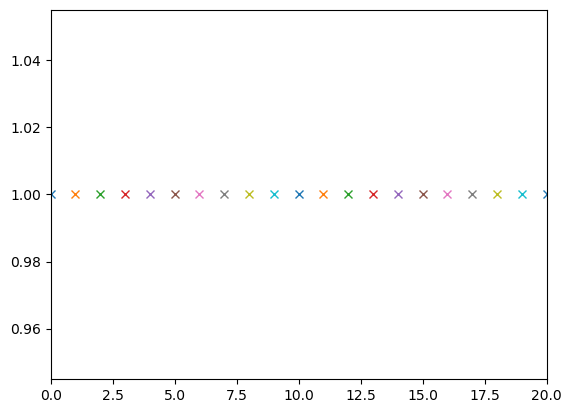

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 

for i in range(21):
    ax.set_xlim(0, 20)
    
    ax.plot(i, 1,marker='x')
    
    clear_output(wait = True)
    display(fig)

    time.sleep(0.01)

<IPython.core.display.Javascript object>


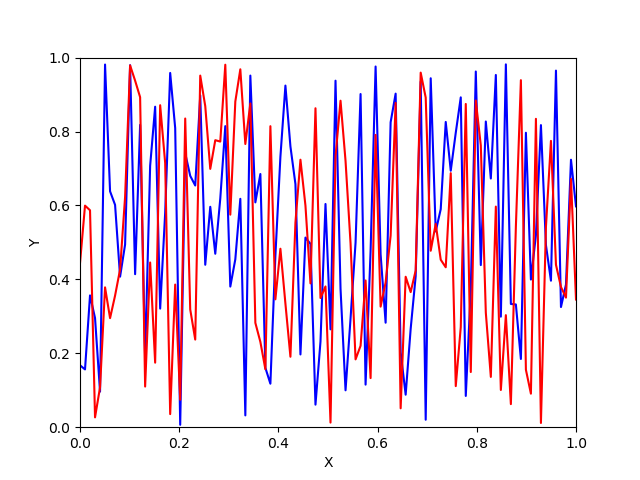

In [21]:
def pltsin(ax, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
for f in range(5):
    pltsin(ax, ['b', 'r'])
    time.sleep(1)

In [20]:
def plot_mon(ax, x, y, colors=['b'], markers=['o']):
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            line.set_ydata(y)
    else:
        for color, marker in zip(colors, markers):
            ax.plot(x, y, color=color, marker=marker)
    #fig.canvas.draw()

In [6]:
data[5]

0     20.0
1     17.0
2     18.0
3     18.0
4     17.0
5     18.0
6     19.0
7     18.0
8     19.0
9     18.0
10    18.0
Name: 5, dtype: object

In [45]:
list(data.iloc[0,0:3])

['79.0', '0.10000000000000001', '1.0']

In [14]:
get_plot_points()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,79.0,0.10000000000000001,0.0,0.0,8.0,180.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,79.200000000000003,0.10000000000000001,0.0,0.0,8.0,180.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,79.400000000000006,0.10000000000000001,0.0,0.0,8.0,181.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,79.599999999999994,0.10000000000000001,1.0,0.0,7.0,181.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,79.799999999999997,0.10000000000000001,0.0,0.0,7.0,181.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,80.0,0.10000000000000001,0.0,0.0,7.0,181.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,80.200000000000003,0.10000000000000001,0.0,0.0,7.0,181.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,80.400000000000006,0.10000000000000001,0.0,0.0,7.0,180.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,80.599999999999994,0.10000000000000001,0.0,0.0,7.0,179.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,80.799999999999997,0.10000000000000001,0.0,0.0,8.0,180.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


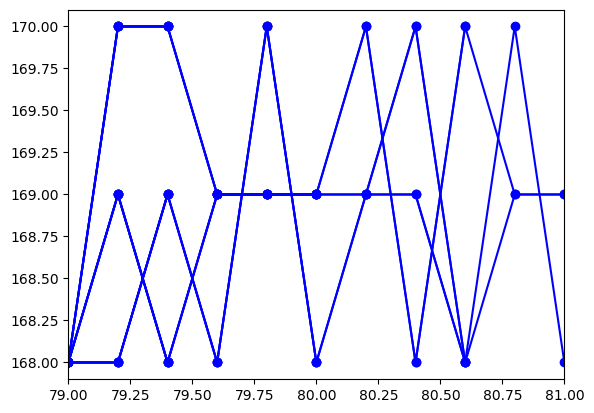

['81.0', '0.10000000000000001', '0.0', '0.0', '7.0']


In [21]:
fig, ax = plt.subplots()
ax.set_xlim(79,81)

try:
    while True:

        data = get_plot_points()

        if len(data.columns) != 128:
            continue

        if len(data) == 1:
            prev_data = data

        if len(data) == len(prev_data):
            time.sleep(1)
            continue
        else:
            prev_data = data

        try:
            ax.set_xlim(79,81)
            #plot_mon(ax, data[0].astype(float), data[1].astype(float), colors=['b'], markers=['o'])
            ax.plot(data[0].astype(float), data[5].astype(float), marker='o', color='b');
            clear_output(wait=True)
            display(fig)    
            print(list(data.iloc[-1,0:5]))

        except:
            pass

        time.sleep(1)
            
except KeyboardInterrupt:
    pass

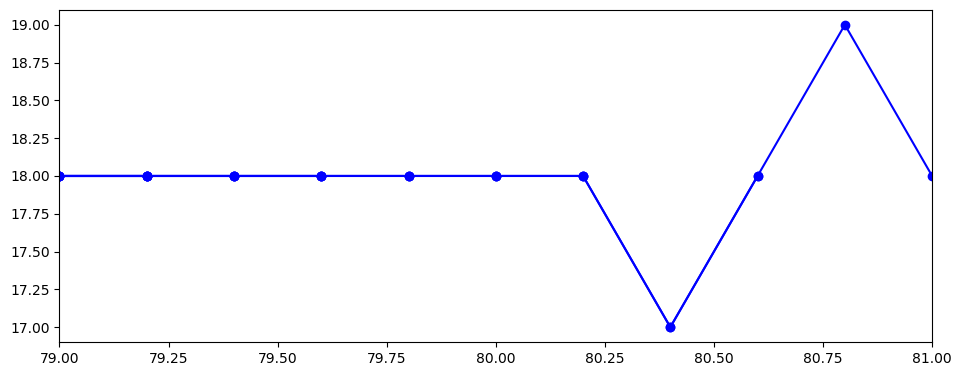

['81.0', '0.01', '0.0', '0.0', '1.0']
['Fri Nov  8 16:36:27 2019:    L-- OK, reply: 1']
['Fri Nov  8 16:36:27 2019:    L-- OK, reply: 1']
['Fri Nov  8 16:36:27 2019:    L-- OK, reply: 1']
['Fri Nov  8 16:36:27 2019:    L-- OK, reply: 1']
['Fri Nov  8 16:36:27 2019:    L-- OK, reply: 1']
['Fri Nov  8 16:36:27 2019:    L-- OK, reply: 1']
['Fri Nov  8 16:36:27 2019:    L-- OK, reply: 1']
['Fri Nov  8 16:36:27 2019:    L-- OK, reply: 1']
['Fri Nov  8 16:36:27 2019:    L-- OK, reply: 1']
['Fri Nov  8 16:36:27 2019:    L-- OK, reply: 1']
['Fri Nov  8 16:36:27 2019:    L-- OK, reply: 1']
['Fri Nov  8 16:36:27 2019:    L-- OK, reply: 1']
['Fri Nov  8 16:36:27 2019:    L-- OK, reply: 1']
['Fri Nov  8 16:36:27 2019:    L-- OK, reply: 1']
['Fri Nov  8 16:36:27 2019:    L-- OK, reply: 1']
['Fri Nov  8 16:36:27 2019:    L-- OK, reply: 1']
['Fri Nov  8 16:36:27 2019:    L-- OK, reply: 1']
['Fri Nov  8 16:36:27 2019:    L-- OK, reply: 1']
['Fri Nov  8 16:36:27 2019:    L-- OK, reply: 1']
['Fri Nov  8

In [17]:
#fig, ax = plt.subplots()
#ax.set_xlim(79,81)

try:
    while True:
        #scan_status = get_scan_status()
        #print(scan_status)
        print(get_sis_logs(num_entries=1))
        while is_SpecBusy():#scan_status != 'finished':
            print('scan running')
            #scan_status = get_scan_status()

            data = get_plot_points()
            
            if len(data.columns) != 128:
                continue
                
            if len(data) == 1:
                prev_data = data
                
            if len(data) == len(prev_data):
                continue
            else:
                prev_data = data
                
            try:
                ax.set_xlim(79,81)
                #plot_mon(ax, data[0].astype(float), data[1].astype(float), colors=['b'], markers=['o'])
                ax.plot(data[0].astype(float), data[5].astype(float), marker='o', color='b');
                clear_output(wait=True)
                display(fig)    
                print(list(data.iloc[-1,0:5]))
                
            except:
                pass
            
            time.sleep(0.5)
            
        time.sleep(0.1)

except KeyboardInterrupt:
    pass

In [16]:
get_sis_logs(num_entries=1)

['Fri Nov  8 13:17:39 2019:    L-- OK, reply: 1']

In [9]:
import os, time

pdi_path = "P:\\bl2-1\\Dunn"
img_path = "Z:\\"

paths = [pdi_path, img_path]
filetypes = ['pdi', 'raw']

before = dict( [filetype, dict([(f, None) for f in filter(os.listdir (path), f'*{filetype}')])]
               for (path, filetype) in zip(paths, filetypes) )

while 1:
    time.sleep (0.1)
    after = dict ( [filetype, dict ([(f, None) for f in filter(os.listdir (path), f'*{filetype}')])]
               for (path, filetype) in zip(paths, filetypes) )
    
    for filetype in after.keys():
        added = [f for f in after[filetype] if not f in before[filetype]]
        removed = [f for f in before[filetype] if not f in after[filetype]]
        if added: print(f"{filetype} - Added: {''.join (added)}")
        if removed: print(f"{filetype} - Removed: {', '.join (removed)}")
    
    before = after

TypeError: 'list' object is not callable

In [48]:
data

,0
0,Wed Nov 6 18:08:11 2019: command: print 'lup ...


In [12]:
x = data[0]
np.round(x,2)

TypeError: can't multiply sequence by non-int of type 'float'

In [19]:
fig, ax = plt.subplots()

ax.set_xlim((79.,81.))


ax.plot(data[0].astype(float), data[3].astype(float), marker='o', color='b');

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [37]:
get_current_scan_details()

'status=finished ID=checkout_191105_21 pt=21 type=33 X_lbl=tth Y_lbl=mon ctr_idx=2'

In [12]:
all_logs = []

while True:
    sis_logs = get_sis_logs(num_entries=2)
    if len(sis_logs) == 0:
        print('no log')
    all_logs.append((sis_logs))
    time.sleep(0.1)

no log
no log


KeyboardInterrupt: 

['Wed Nov  6 14:31:47 2019:    L-- OK, reply: 1',
 "Wed Nov  6 14:33:52 2019: command: print 'lup tth -1 1 20 1';lup tth -1 1 20 1"]

In [40]:
specCommand('lup tth -1 1 20 0.01')

scan_running = True
while scan_running:
    scan_details = get_current_scan_details()
    scan_status = re.search('status=(.*) ID', scan_details).group(1)
    if scan_status == 'finished':
        scan_running = False
        print('done')

    data = get_plot_points()

done


## Lets get all the motor and counter mnemonics

In [5]:
payload = {}
r = requests.get(bServer + "get_all_counter_mnemonics", params=payload)
print(r)
g = r.json()
print(g['data'])

<Response [200]>
['sec', 'mon', 'det', 'i0', 'i2', 'fstat', 'normlz', 'A34410', 'kpow', 'ch5', 'ch6', 'ch7', 'ICR', 'OCR', 'ROI1', 'ROI2', 'ROI3', 'ROI4', 'ROI5', 'ROI6', 'ROI7', 'TEMP', 'tempsec', 'CTEMP', 'timesec', 'gkcnt1', 'gkcnt2', 'keith_I', 'keith_V', 'pd1', 'pd2', 'pd3', 'pd4', 'pd5', 'pd6', 'pd7', 'pd8', 'pd9', 'pd10', 'pd11', 'pd12', 'pd13', 'pd14', 'pd15', 'pd16', 'PD_MIN', 'PD_MAX', 'agdaq1', 'agdaq2', 'agdaq3', 'agdaq4', 'CTEMPB']


In [6]:
payload = {}
r = requests.get(bServer + "get_all_motor_mnemonics", params=payload)
print(r)
g = r.json()
print(g['data'])

<Response [200]>
['m0vtran', 'm0pitch', 'm0yaw', 'm3', 'm0bend', 'diag', 'm0hsl', 'm0vsl', 'crystal', 'anz', 'th', 'tth', 'vert', 'vort_x', 'vort_y', 'vort_z', 'gonx', 'gony', 'gonchi', 'gonthe', 't0v', 'b0v', 'l0h', 'r0h', 't1v', 'b1v', 'l1h', 'r1h', 't2v', 'b2v', 'l2h', 'r2h', 't3v', 'zstage', 'l3h', 'r3h', 'table', 'thor', 'ald', 'b3v', 'h0gap', 'h0tran', 'v0gap', 'v0tran', 'h1gap', 'h1tran', 'v1gap', 'v1tran', 'h2gap', 'h2tran', 'v2gap', 'v2tran', 'v3gap', 'v3tran', 'h3gap', 'h3tran', '_Q', 'mono', 'tempset', 'cryomot', 'cth', 'ctth', 'kmotV', 'kmotI']


Lets play with the console output buffer stuff a bit. This is the first example where payload is used. Note, my code internally with correctly convert the string value of 'True' in a get request to an actual True value.  This will be unnecessary when I switch to a post request with json data.

The get_buffer_index returns the current index value of the buffer. This is really useful for figuring out where the buffer is before executing a command

In [5]:
payload = {'get_buffer_index': True}
r = requests.get(bServer + "get_console_output_buffer", params=payload)
print(r)
g = r.json()
print(g['data'])

<Response [200]>
611


In [8]:
payload = {}
r = requests.get(bServer + "get_console_output_buffer", params=payload)
print(r)
g = r.json()
print(g['data'])
print(len(g['data']))

<Response [200]>
['assall', '3.TWOC> ', 'lvdts', 'LVDT VALUES', '===================================================================', 'm0vtran_lvdt= -0.4102 motor= -0.3294', 'm0pitch_lvdt= -0.1648 motor= 0.159655', 'm0yaw_lvdt= -0.8533 motor= 0.115299', 'm0bend_lvdt= -1.8701 motor= 5.94063', 'm0vsl_lvdt= -0.2734 motor= -13.4619', 'm0hsl_lvdt= -0.0342 motor= 1', 'type <lvdts save> to write to values to a text file', '4.TWOC> ', 'mvr m0hsl .1', 'MC4183s01b error sending "BG G":  Begin not possible due to Limit Switch.', '\x07', 'Counter-clockwise hard limit on motor 6, unit 0, "m0hsl".', '5.TWOC> ', 'mvr m0hsl -.1', 'MC4183s01b error sending "BG G":  Begin not possible due to Limit Switch.', '\x07', 'Counter-clockwise hard limit on motor 6, unit 0, "m0hsl".', '6.TWOC> ', 'mvr m0hsl .1', '7.TWOC> ', 'mvr m0vsl .1', 'MC4183s01b error sending "BG H":  Begin not possible due to Limit Switch.', '\x07', 'Counter-clockwise hard limit on motor 7, unit 0, "m0vsl".', '8.TWOC> ', 'mvr m0vsl -.1', 

Note that this command only returns up to 999 lines. 

we can grab the last N lines by setting get_buffer_index to False and setting N (apparently this returns N-1 lines?

In [14]:
payload = {'get_buffer_index': False, 'N': 10}
r = requests.get(bServer + "get_console_output_buffer", params=payload)
print(r)
g = r.json()
print(g['data'])
print(len(g['data']))

<Response [200]>
[' High     24.000 ', ' Current  13.950 ', ' Low      -5.000 ', '118.TWOC> ', 'set_dials zstage 17', 'Tue Oct 29 11:00:14 2019.  Z-Stage dial reset from 13.95 to 17.', 'Tue Oct 29 11:00:14 2019.  Z-Stage reset from 13.95 to 17.', '119.TWOC> ']
8


In [4]:
r = requests.get(bServer + "get_remote_control")
print(r.json())

{'help': 'Get the current plot. Not sure what this actually is', 'data': 'client in control.'}


We can also get return_after a specific console buffer index. Lets start by issuing a simple command to get some new values in the buffer.... a count will suffice. We need to get remote control of SPEC first - make sure spectre is off and remcon on is enabled in SPEC

After getting control, I execute the command and return the UUID of the command (1 in this case)then check when the result is done. Note. If ask before the command is finished executing, I won't get the result from the correct UUID.

In [10]:
payload = {}
r = requests.get(bServer + "get_remote_control", params=payload)
print(r)
g = r.json()
print(g)
print(g['data'])

<Response [200]>
{'help': 'Get the current plot. Not sure what this actually is', 'data': 'control not available.'}
control not available.


In [8]:
payload = {'spec_cmd': 'ct 1 #UUID225'}
r = requests.get(bServer + "execute_command", params=payload)
print(r)
g = r.json()
print(g['data'])

<Response [200]>
4


In [18]:
payload = {}
r = requests.get(bServer + "retrieve_result", params=payload)
print(r)
g = r.json()
print(g['data'])

<Response [200]>
{'uuid': 1, 'status ok': True, 'result': '0'}


Waiting a bit longer for the command to actually finish:

In [20]:
payload = {}
r = requests.get(bServer + "retrieve_result", params=payload)
print(r)
g = r.json()
print(g['data'])

<Response [200]>
{'uuid': 1, 'status ok': True, 'result': '0'}


In [21]:
payload = {}
r = requests.get(bServer + "get_console_output_buffer", params=payload)
print(r)
g = r.json()
print(g['data'])
print(len(g['data']))

<Response [200]>
['assall', '3.TWOC> ', 'lvdts', 'LVDT VALUES', '===================================================================', 'm0vtran_lvdt= -0.4102 motor= -0.3294', 'm0pitch_lvdt= -0.1648 motor= 0.159655', 'm0yaw_lvdt= -0.8533 motor= 0.115299', 'm0bend_lvdt= -1.8701 motor= 5.94063', 'm0vsl_lvdt= -0.2734 motor= -13.4619', 'm0hsl_lvdt= -0.0342 motor= 1', 'type <lvdts save> to write to values to a text file', '4.TWOC> ', 'mvr m0hsl .1', 'MC4183s01b error sending "BG G":  Begin not possible due to Limit Switch.', '\x07', 'Counter-clockwise hard limit on motor 6, unit 0, "m0hsl".', '5.TWOC> ', 'mvr m0hsl -.1', 'MC4183s01b error sending "BG G":  Begin not possible due to Limit Switch.', '\x07', 'Counter-clockwise hard limit on motor 6, unit 0, "m0hsl".', '6.TWOC> ', 'mvr m0hsl .1', '7.TWOC> ', 'mvr m0vsl .1', 'MC4183s01b error sending "BG H":  Begin not possible due to Limit Switch.', '\x07', 'Counter-clockwise hard limit on motor 7, unit 0, "m0vsl".', '8.TWOC> ', 'mvr m0vsl -.1', 

Ok. Lets get the console output buffer again. We want to know the current index so we can ask for the correct number of lines 

In [22]:
payload = {'get_buffer_index': True}
r = requests.get(bServer + "get_console_output_buffer", params=payload)
print(r)
g = r.json()
print(g['data'])

<Response [200]>
348


In [34]:
1156335 - 1156417

-82

### So I need to grab 82 lines 

Note: I executed the ct command twice

In [35]:
payload = {'get_buffer_index': False, 'N': 82}
r = requests.get(bServer + "get_console_output_buffer", params=payload)
print(r)
g = r.json()
print(g['data'])
print(len(g['data']))

<Response [200]>
['Mon Mar 26 00:18:00 2018', '     Seconds = 1', '          i0 = 399 (399/s)', '          i1 = 0 (0/s)', '         mon = 0 (0/s)', '       bstop = 3753 (3753/s)', '       Omron = 3834 (3834/s)', '         CH6 = 0 (0/s)', '         CH7 = 0 (0/s)', '        TEMP = 79.9 (79.9/s)', '      marccd = -1 (-1/s)', '       ICRxT = 1 (1/s)', '       OCRxT = 1 (1/s)', '        ROI1 = 1 (1/s)', '        ROI2 = 1 (1/s)', '        ROI3 = 1 (1/s)', '        ROI4 = 1 (1/s)', '        ROI5 = 1 (1/s)', '        ROI6 = 1 (1/s)', '        ROI7 = 1 (1/s)', '        ROI8 = 1 (1/s)', '        ROI9 = 1 (1/s)', '       ROI10 = 1 (1/s)', '       RIO11 = 1 (1/s)', '       ROI12 = 1 (1/s)', '       ROI13 = 1 (1/s)', '         SWX = 0 (0/s)', '        CCD1 = 0 (0/s)', '       CTEMP = 78.2551 (78.2551/s)', '       Timer = 391079 (391079/s)', '         pd1 = -1 (-1/s)', '       PRESS = 0 (0/s)', '      lvdt11 = 0 (0/s)', '      lvdt12 = 0 (0/s)', '      lvdt21 = 0 (0/s)', '      lvdt22 = 0 (0/s)', ' 

In [40]:
payload = {}
r = requests.get(bServer + "get_all_counters", params=payload)
print(r)
g = r.json()
print(g['data'])

<Response [200]>
[1.0, 405.0, 0.0, 0.0, 3737.0, 3732.0, 0.0, 0.0, 79.9000015258789, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 78.3235778808594, 391249.358817816, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [41]:
payload = {}
r = requests.get(bServer + "get_all_motor_positions", params=payload)
print(r)
g = r.json()
print(g['data'])

<Response [200]>
[1.2999997619047619, 0.0, -5.000000142857143, 0.0, -191.8, 50.0, -1.2434817620032845e-06, -187.22081218274113, 0.0, 0.0, 0.0, 0.0, 7.100583668275336, 45.409575257810516, 43.896179923559444, 0.0, 2.475250000000001, 0.5899999999999999, 50.0, -1.1225, 0.1200000000000001, 0.0, 2.149544873862159, -3.447335240572171, -0.9517763756345178, 2.6992388629441626, 0.2652284263959391, 0.14974619289340102, 0.0, 23182.0, 61522.0, 17.1625, 0.0001567644, 3.901550268707048, 7.838219000000001e-05, 9.52085664056161, -3.202124183006536, -3.7870915032679737, 0.0, 0.0, -6.0, -6.0, -44.099999999999994, 0.0, 1.5, -57.8, 127.562, -54.00943516431925, 0.7959176470588236, 0.9205, 4.0703, 0.2096, -0.1309, -3.5212, -0.3642, -6.0, 0.0, 0.8, 2.253, 0.8, 9.778, 0.9, 1.15, 0.5, -5.041, 6700.0, -41.435, 2331.015, -235.94, 10.178, -9.378, -1.8530000000000002, 2.653, -4.791, 5.291, -0.7000000000000002, 1.6000000000000005, 0.4, -8.709, 0.4, 0.69, 4.3005, 1.7735, -0.8, -0.6, 0.89, -0.4900000000000002, 8.909, 

# Lets test out the return of the plot points

I'm going to use the last scan that I see which looks like some bstop counts and a nice gaussian

In [50]:
payload = {}
r = requests.get(bServer + "get_current_plot_point_index", params=payload)
print(r)
g = r.json()
print(g['data'])

<Response [200]>
4294


In [36]:
payload = {}
r = requests.get(bServer + "get_plot_points", params=payload)
print(r)
g = r.json()
print(g['data'])

<Response [200]>
[['0.0', '0.10000000000000001', '0.0', '0.0', '5.0', '181.0', '1111.0', '0.0', '0.0', '0.0', '0.0', '10.0', '16.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '-1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0'], ['0.010000000000000009', '0.10000000000000001', '0.0', '0.0'

import pandas as pd
import numpy as np
from matplotlib.image import imread
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook

In [53]:
payload = {}
r = requests.get(bServer + "get_plot_points", params=payload)
print(r)
g = r.json()
#print(g['data'])

t0 = time.time()
myDat = pd.DataFrame(g['data'])
print(time.time()-t0)
print(myDat)

<Response [200]>
0.20280003547668457
                     0                    1    2    3    4      5       6    \
0     5.2800000000000002  0.10000000000000001  0.0  0.0  6.0  183.0  1111.0   
1                   5.29  0.10000000000000001  0.0  0.0  6.0  183.0  1111.0   
2     5.2999999999999998  0.10000000000000001  0.0  0.0  6.0  183.0  1111.0   
3     5.3100000000000005  0.10000000000000001  0.0  0.0  6.0  183.0  1111.0   
4     5.3200000000000003  0.10000000000000001  0.0  0.0  6.0  181.0  1111.0   
...                  ...                  ...  ...  ...  ...    ...     ...   
4091  46.190000000000005  0.10000000000000001  0.0  0.0  6.0  183.0  1111.0   
4092  46.200000000000003  0.10000000000000001  0.0  0.0  6.0  182.0  1111.0   
4093  46.210000000000001  0.10000000000000001  0.0  0.0  5.0  182.0  1111.0   
4094  46.220000000000006  0.10000000000000001  0.0  0.0  5.0  181.0  1111.0   
4095  46.230000000000004  0.10000000000000001  0.0  0.0  5.0  183.0  1111.0   

      7    8  

In [52]:
print(myDat)

                     0                    1    2    3    4      5       6    \
0     3.3800000000000003  0.10000000000000001  0.0  0.0  6.0  184.0  1111.0   
1     3.3900000000000001  0.10000000000000001  0.0  0.0  5.0  182.0  1111.0   
2     3.4000000000000004  0.10000000000000001  0.0  0.0  5.0  182.0  1111.0   
3     3.4100000000000001  0.10000000000000001  0.0  0.0  5.0  183.0  1111.0   
4     3.4200000000000004  0.10000000000000001  0.0  0.0  6.0  182.0  1111.0   
...                  ...                  ...  ...  ...  ...    ...     ...   
4091  44.290000000000006  0.10000000000000001  0.0  0.0  6.0  182.0  1111.0   
4092  44.300000000000004  0.10000000000000001  0.0  0.0  6.0  183.0  1111.0   
4093  44.310000000000002  0.10000000000000001  0.0  0.0  5.0  183.0  1111.0   
4094               44.32  0.10000000000000001  0.0  0.0  6.0  183.0  1111.0   
4095  44.330000000000005  0.10000000000000001  0.0  0.0  6.0  181.0  1111.0   

      7    8    9    ...  118  119  120  121  122  

In [21]:
payload = {}
r = requests.get(bServer + "get_all_counter_mnemonics", params=payload)
print(r)
g = r.json()
print(g['data'])

<Response [200]>
['sec', 'mon', 'det', 'i0', 'i2', 'fstat', 'normlz', 'A34410', 'kpow', 'ch5', 'ch6', 'ch7', 'ICR', 'OCR', 'ROI1', 'ROI2', 'ROI3', 'ROI4', 'ROI5', 'ROI6', 'ROI7', 'TEMP', 'tempsec', 'CTEMP', 'timesec', 'gkcnt1', 'gkcnt2', 'keith_I', 'keith_V', 'pd1', 'pd2', 'pd3', 'pd4', 'pd5', 'pd6', 'pd7', 'pd8', 'pd9', 'pd10', 'pd11', 'pd12', 'pd13', 'pd14', 'pd15', 'pd16', 'PD_MIN', 'PD_MAX', 'agdaq1', 'agdaq2', 'agdaq3', 'agdaq4', 'CTEMPB']


In [22]:
payload = {}
r = requests.get(bServer + "get_all_motor_mnemonics", params=payload)
print(r)
g = r.json()
print(g['data'])

<Response [200]>
['m0vtran', 'm0pitch', 'm0yaw', 'm3', 'm0bend', 'diag', 'm0hsl', 'm0vsl', 'crystal', 'anz', 'th', 'tth', 'vert', 'vort_x', 'vort_y', 'vort_z', 'gonx', 'gony', 'gonchi', 'gonthe', 't0v', 'b0v', 'l0h', 'r0h', 't1v', 'b1v', 'l1h', 'r1h', 't2v', 'b2v', 'l2h', 'r2h', 't3v', 'zstage', 'l3h', 'r3h', 'table', 'thor', 'ald', 'b3v', 'h0gap', 'h0tran', 'v0gap', 'v0tran', 'h1gap', 'h1tran', 'v1gap', 'v1tran', 'h2gap', 'h2tran', 'v2gap', 'v2tran', 'v3gap', 'v3tran', 'h3gap', 'h3tran', '_Q', 'mono', 'tempset', 'cryomot', 'cth', 'ctth', 'kmotV', 'kmotI']


Alright, lets try just getting the last N points.

When the scans get larger, this becomes importantish.... the transfer time and parsing time can become considerable (even with a package like pandas... typically less than a second but still....)

In [72]:
payload = {'num_pts': 3}
r = requests.get(bServer + "get_plot_points", params=payload)
print(r)
g = r.json()
print(g['data'])

<Response [200]>
[['3.3420000000000005', '1.0', '13451.0', '0.0', '0.0', '7823.0', '4121.0', '0.0', '0.0', '-1.0', '-1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '0.0', '0.0', '34.518798828125', '167781.867918968', '-1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0'], ['3.4087499999999995', '1.0', '

## Here is an example of what happens when control is not available and some extra stuff

In [24]:
payload = {}
r = requests.get(bServer + "get_remote_control", params=payload)
print(r)
g = r.json()
print(g)
print(g['data'])

<Response [200]>
{'help': 'Get the current plot. Not sure what this actually is', 'data': 'control not available.'}
control not available.


In [16]:
payload = {'spec_cmd': 'lup rail3_x -0.1 0.1 12 0.1'}
r = requests.get(bServer + "execute_command", params=payload)
print(r)
g = r.json()
print(g['data'])

<Response [200]>
1


In [23]:
payload = {'spec_cmd': 'ct 1 #UUID223'}
r = requests.get(bServer + "execute_command", params=payload)
print(r)
g = r.json()
print(g['data'])

<Response [200]>
3


In [25]:
payload = {}
r = requests.get(bServer + "retrieve_result", params=payload)
print(r)
g = r.json()
print(g['data'])

<Response [200]>
{'uuid': 3, 'status ok': True, 'result': '0'}


In [8]:
payload = {'unix_cmd': "pwd"}
r = requests.get(bServer + "execute_unix_command", params=payload)
print(r)
g = r.json()
print(g['data'])

<Response [200]>
{'success': False, 'response': '/usr/local/lib/spec.log/dist'}


In [6]:
payload = {}
r = requests.get(bServer + "release_remote_control", params=payload)
print(r)
g = r.json()
print(g['data'])

<Response [200]>
client not in control.


In [295]:
payload = {'set_logging_on': True}
r = requests.get(bServer + "set_sis_logging", params=payload)
print(r)
g = r.json()
print(g['data'])

<Response [200]>
Logging is ON.


In [37]:
payload = {}
r = requests.get(bServer + "get_sis_logs", params=payload)
print(r)
data = r.json()['data']

for p in data:
    print((p))

<Response [200]>
logging is off!


In [232]:
t0 = time.time()
myDat.to_dict()
print(time.time() - t0)

0.04801487922668457


In [235]:
payload = {'num_pts':2}
r = requests.get(bServer + "get_plot_points", params=payload)
print(r)
g = r.json()
print(g['data'])

<Response [200]>
[['-4.0017499999999977', '0.10000000000000001', '36.0', '0.0', '0.0', '0.0', '369.0', '0.0', '0.0', '0.0', '-1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '0.0', '0.0', '-1.0', '269933.74679493898', '-1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0'], ['-4.0', '0.10000000000000001',